In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

## 1. Load Data

In [2]:
examples_path = os.path.join('..', 'data', 'shopping_queries_dataset_examples.parquet')
products_path = os.path.join('..', 'data', 'shopping_queries_dataset_products.parquet')
sources_path = os.path.join('..', 'data', 'shopping_queries_dataset_sources.csv')

examples = pd.read_parquet(examples_path)
products = pd.read_parquet(products_path)
sources = pd.read_csv(sources_path)

## 2. Merge and Filter Data

Merging data and filtering down to English only by selecting locale = US

In [3]:
examples_products = pd.merge(
    examples,
    products,
    how='left',
    left_on=['product_locale','product_id'],
    right_on=['product_locale', 'product_id']
)

examples_products = examples_products[examples_products['product_locale'] == 'us']

Separating dataset into reduced and large version - reduced version will be used for task 1, large version will be used for tasks 2 and 3

In [4]:
reduced = examples_products[examples_products['small_version'] == 1]
large = examples_products[examples_products['large_version'] == 1]

## 3. Combined Data EDA

In [26]:
examples_products

,example_id,query,query_id,product_id,product_locale,esci_label,small_version,large_version,split,product_title,product_description,product_bullet_point,product_brand,product_color,query_length,product_title_length
0,0,revent 80 cfm,0,B000MOO21W,us,I,0,1,train,Panasonic FV-20VQ3 WhisperCeiling 190 CFM Ceil...,None,WhisperCeiling fans feature a totally enclosed...,Panasonic,White,14,61
1,1,revent 80 cfm,0,B07X3Y6B1V,us,E,0,1,train,Homewerks 7141-80 Bathroom Fan Integrated LED ...,None,OUTSTANDING PERFORMANCE: This Homewerk's bath ...,Homewerks,80 CFM,14,104
2,2,revent 80 cfm,0,B07WDM7MQQ,us,E,0,1,train,Homewerks 7140-80 Bathroom Fan Ceiling Mount E...,None,OUTSTANDING PERFORMANCE: This Homewerk's bath ...,Homewerks,White,14,90
3,3,revent 80 cfm,0,B07RH6Z8KW,us,E,0,1,train,Delta Electronics RAD80L BreezRadiance 80 CFM ...,This pre-owned or refurbished product has been...,Quiet operation at 1.5 sones\nBuilt-in thermos...,DELTA ELECTRONICS (AMERICAS) LTD.,White,14,84
4,4,revent 80 cfm,0,B07QJ7WYFQ,us,E,0,1,train,Panasonic FV-08VRE2 Ventilation Fan with Reces...,None,The design solution for Fan/light combinations...,Panasonic,White,14,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2618565,2618565,자전거트레일러,130539,B06XTZYJL3,us,I,1,1,train,Nilight - ZH003 20Inch 126W Spot Flood Combo L...,None,Super bright beam: High intensity 3W LED chips...,Nilight,None,7,170
2618566,2618566,자전거트레일러,130539,B010LLGWL8,us,E,1,1,train,"Burley Honey Bee, 2 Seat Kids Bike Trailer & S...",None,Sport Type: Cycling,Burley Design,Red,7,58
2618567,2618567,자전거트레일러,130539,B010LLGWKE,us,E,1,1,train,"BURLEY Design Bee, 2 Seat, Lightweight, Kids B...",None,sport type: Cycling,Burley Design,Yellow,7,79
2618568,2618568,자전거트레일러,130539,B003CUBPUY,us,I,1,1,train,"Bell 20-Inch Universal Inner Tube, Width Fit R...",None,Mold cured rubber for consistent side wall–pre...,BELL,"20""x1.75-2.25"" Schrader",7,73


In [6]:
print(f'Full data shape: {examples_products.shape}')

Full data shape: (1818825, 14)


In [7]:
print('Columns and datatype info:')
print(examples_products.info())

Columns and datatype info:
<class 'pandas.core.frame.DataFrame'>
Index: 1818825 entries, 0 to 2618569
Data columns (total 14 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   example_id            int64 
 1   query                 object
 2   query_id              int64 
 3   product_id            object
 4   product_locale        object
 5   esci_label            object
 6   small_version         int64 
 7   large_version         int64 
 8   split                 object
 9   product_title         object
 10  product_description   object
 11  product_bullet_point  object
 12  product_brand         object
 13  product_color         object
dtypes: int64(4), object(10)
memory usage: 208.1+ MB
None


In [8]:
print(f'Null values:\n{examples_products.isnull().sum()}')

Null values:
example_id                   0
query                        0
query_id                     0
product_id                   0
product_locale               0
esci_label                   0
small_version                0
large_version                0
split                        0
product_title                0
product_description     914772
product_bullet_point    214083
product_brand            83450
product_color           545228
dtype: int64


In [9]:
unique_products = examples_products['product_title'].nunique()
print(f'Unique products: {unique_products}')

Unique products: 1193658


In [10]:
unique_queries = examples_products['query'].nunique()
print(f'Unique queries: {unique_queries}')

Unique queries: 97345


In [11]:
examples_products['query_length'] = examples_products['query'].str.len()

In [12]:
examples_products['product_title_length'] = examples_products['product_title'].str.len()

In [13]:
examples_products['query_length'].describe()

count    1.818825e+06
mean     2.143909e+01
std      9.877585e+00
min      1.000000e+00
25%      1.500000e+01
50%      2.000000e+01
75%      2.700000e+01
max      1.710000e+02
Name: query_length, dtype: float64

Text(0.5, 1.0, 'Reduced Dataset Query Str Length Distribution')

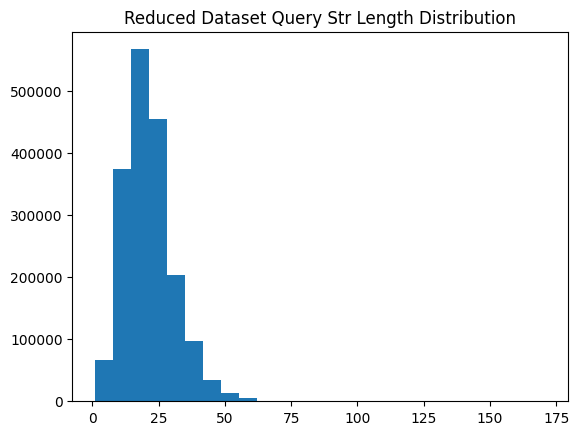

In [14]:
plt.hist(examples_products['query_length'], bins=25)
plt.title('Reduced Dataset Query Str Length Distribution')

In [15]:
pd.options.display.float_format = '{:.2f}'.format
examples_products['product_title_length'].describe()

count   1818825.00
mean        109.81
std          52.14
min           1.00
25%          68.00
50%         102.00
75%         154.00
max         400.00
Name: product_title_length, dtype: float64

Text(0.5, 1.0, 'Reduced Dataset Product Title Str Length Distribution')

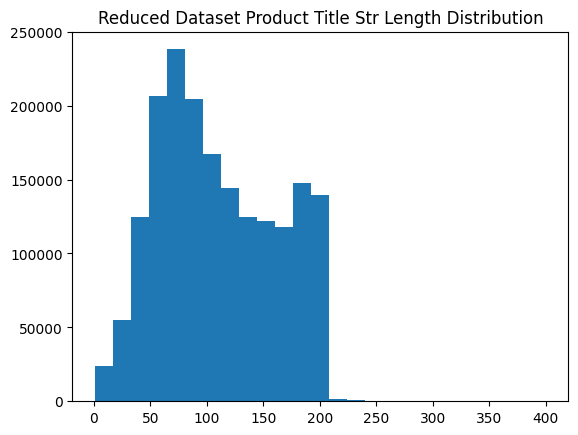

In [16]:
plt.hist(examples_products['product_title_length'], bins=25)
plt.title('Reduced Dataset Product Title Str Length Distribution')

In [17]:
total_judgements = examples_products['esci_label'].count()
print(total_judgements)

1818825


### Queries per product

In [18]:
product_query_counts = examples_products.groupby('product_title')['query'].count().reset_index()

product_query_counts.columns = ['product', 'query_count']

product_query_counts = product_query_counts.sort_values(by='query_count', ascending=False)

In [19]:
product_query_counts.head(10)

,product,query_count
798222,Pilot,221
360026,Episode 1,204
280394,Currently Unsupervised Novelty Graphic Sarcast...,120
382078,Feelin Good Tees My Opinion Offended You Adult...,114
74256,"Acer Aspire 5 Slim Laptop, 15.6 inches Full HD...",111
508702,I'm Fine Graphic Novelty Sarcastic Funny T Shi...,108
133971,BENGOO G9000 Stereo Gaming Headset for PS4 PC ...,101
1049367,Twinkle Star 300 LED Window Curtain String Lig...,98
1045715,"TruSkin Vitamin C Serum for Face, Anti Aging S...",96
1110907,When This Virus is Over Graphic Novelty Sarcas...,94


In [20]:
product_query_counts.describe()

,query_count
count,1193658.00
mean,1.52
std,1.77
min,1.00
25%,1.00
50%,1.00
75%,1.00
max,221.00


### Products per query

In [21]:
query_product_counts = examples_products.groupby('query')['product_title'].count().reset_index()

query_product_counts.columns = ['query', 'product_count']

query_product_counts = query_product_counts.sort_values(by='product_count', ascending=False)

In [22]:
query_product_counts.head(5)

,query,product_count
88554,tv,198
6208,airpods,188
49915,laptop,167
77206,shoes,158
69482,printer,136


In [23]:
query_product_counts.describe()

,product_count
count,97345.00
mean,18.68
std,7.98
min,8.00
25%,16.00
50%,16.00
75%,16.00
max,198.00


### Most common brands

In [24]:
top_products = examples_products['product_brand'].value_counts().nlargest(20)

In [25]:
top_products.head()

product_brand
Nike                 8450
Amazon Basics        6861
adidas               6392
Amazon Essentials    6075
Apple                5634
Name: count, dtype: int64